# Final project notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip3 install -q pybind11
!pip uninstall -q --yes gdown
!pip install -q gdown -U --no-cache-dir
!pip3 install -q --upgrade --no-deps git+https://github.com/dlsys10714/mugrade.git

In [3]:
# Code to set up the assignment
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/
    !mkdir -p 10714
    %cd /content/drive/MyDrive/10714
    !git clone https://github.com/Edyarich/dlsystems-final-project
    %cd /content/drive/MyDrive/10714/dlsystems-final-project

In [3]:
!make

-- Found pybind11: /home/eduard/.local/lib/python3.8/site-packages/pybind11/include (found version "2.10.0")
CUDA_TOOLKIT_ROOT_DIR not found or specified
-- Could NOT find CUDA (missing: CUDA_TOOLKIT_ROOT_DIR CUDA_NVCC_EXECUTABLE CUDA_INCLUDE_DIRS CUDA_CUDART_LIBRARY) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/eduard/git/dlsystems-final-project/build
make[1]: вход в каталог «/home/eduard/git/dlsystems-final-project/build»
make[2]: вход в каталог «/home/eduard/git/dlsystems-final-project/build»
make[3]: вход в каталог «/home/eduard/git/dlsystems-final-project/build»
make[3]: выход из каталога «/home/eduard/git/dlsystems-final-project/build»
[100%] Built target ndarray_backend_cpu
make[2]: выход из каталога «/home/eduard/git/dlsystems-final-project/build»
make[1]: выход из каталога «/home/eduard/git/dlsystems-final-project/build»


In [4]:
import sys
sys.path.append('./python')
sys.path.append('./data/')

In [77]:
# Download the datasets you will be using for this project
import os
import gdown
import importlib
from data.utils import rename_and_filter_images
import urllib.request


%cd ./data
DIRNAME = './landscapes/'

if not os.path.exists(DIRNAME):
    !gdown 14g49ILtIYKLt7WXaRPYyVfJGLHxcnQ7s
    !unzip -q landscapes -d landscapes
    !rm landscapes.zip

    rename_and_filter_images(DIRNAME)

if not os.path.isdir("./cifar-10-batches-py"):
    urllib.request.urlretrieve("https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz", "./cifar-10-python.tar.gz")
    !tar -xvzf './cifar-10-python.tar.gz'

%cd ../

/home/eduard/git/dlsystems-final-project/data
/home/eduard/git/dlsystems-final-project


**Создание датасета "Пейзажи"**

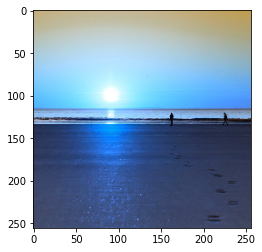

In [13]:
import needle as ndl
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from needle.autograd import Tensor


def plot_landscape(img: np.ndarray):
    img = np.transpose(img, (1, 2, 0))
    img = (img + 1) / 2
    plt.imshow(img);


DATA_DIR = Path('./data/landscapes/')
IMAGE_FILES = sorted(str(x) for x in list(DATA_DIR.rglob('*.jpg')))

transforms = [
    ndl.data.RandomFlipHorizontal(),
    ndl.data.Lambda(lambda img: np.transpose(img, (2, 0, 1))),
]

dataset = ndl.data.LandscapesDataset(IMAGE_FILES, extra_transforms=transforms)
plot_landscape(dataset[12])

**Работа с даталоадером**

In [14]:
dataloader = ndl.data.DataLoader(dataset, batch_size=8)

for batch in dataloader:
    break
    
batch

needle.Tensor([[[[-0.03823529 -0.01378676 -0.01587776 ... -0.27058822 -0.27058822
    -0.27058822]
   [-0.05098039 -0.04313725 -0.03000153 ... -0.27058822 -0.27058822
    -0.27058822]
   [-0.06997549 -0.05324754 -0.05198376 ... -0.27745098 -0.27843136
    -0.27843136]
   ...
   [-0.43767616 -0.54407936 -0.4060738  ... -0.3275735  -0.2516544
    -0.45902267]
   [-0.5916897  -0.4124387  -0.3243719  ... -0.29710478 -0.66760117
    -0.8066789 ]
   [-0.9357154  -0.6149969  -0.42015165 ... -0.41815257 -0.36354166
    -0.2882123 ]]

  [[-0.18725489 -0.16280636 -0.16489735 ... -0.45098037 -0.45098037
    -0.45098037]
   [-0.19999999 -0.19215685 -0.17902113 ... -0.45098037 -0.45098037
    -0.45098037]
   [-0.21899508 -0.20226714 -0.20100336 ... -0.45784312 -0.4588235
    -0.4588235 ]
   ...
   [-0.53179383 -0.638197   -0.4982307  ... -0.37463233 -0.2987132
    -0.50608146]
   [-0.68580735 -0.5065564  -0.41652876 ... -0.3441636  -0.71466
    -0.8537378 ]
   [-0.95804226 -0.6287224  -0.51917124 .

**Тесты на MaxPool и ConvTranspose**

In [13]:
!python3 -m pytest -l -v -k "op_maxpool"

============================= test session starts ==============================
platform linux -- Python 3.9.13, pytest-7.2.0, pluggy-1.0.0 -- /home/eduard/anaconda3/envs/python/bin/python3
cachedir: .pytest_cache
rootdir: /home/eduard/git/dlsystems-final-project
collected 1851 items / 1803 deselected / 48 selected                           

tests/test_conv.py::test_op_maxpool[backward-needle.backend_ndarray.ndarray_backend_cpu-X_shape0-2] PASSED [  2%]
tests/test_conv.py::test_op_maxpool[backward-needle.backend_ndarray.ndarray_backend_cpu-X_shape1-2] PASSED [  4%]
tests/test_conv.py::test_op_maxpool[backward-needle.backend_ndarray.ndarray_backend_cpu-X_shape2-2] PASSED [  6%]
tests/test_conv.py::test_op_maxpool[backward-needle.backend_ndarray.ndarray_backend_cpu-X_shape3-2] PASSED [  8%]
tests/test_conv.py::test_op_maxpool[backward-needle.backend_ndarray.ndarray_backend_cpu-X_shape4-2] PASSED [ 10%]
tests/test_conv.py::test_op_maxpool[backward-needle.backend_ndarray.ndarray_backend_

In [71]:
!python3 -m pytest -l -v -s -k "nn_conv_tr_forward"

============================= test session starts ==============================
platform linux -- Python 3.9.13, pytest-7.2.0, pluggy-1.0.0 -- /home/eduard/anaconda3/envs/python/bin/python3
cachedir: .pytest_cache
rootdir: /home/eduard/git/dlsystems-final-project
collected 1883 items / 1867 deselected / 16 selected                           

tests/test_conv.py::test_nn_conv_tr_forward[needle.backend_ndarray.ndarray_backend_cpu-2-1-1-3-2-1] PASSED
tests/test_conv.py::test_nn_conv_tr_forward[needle.backend_ndarray.ndarray_backend_cpu-2-1-2-3-2-1] PASSED
tests/test_conv.py::test_nn_conv_tr_forward[needle.backend_ndarray.ndarray_backend_cpu-4-8-8-3-1-0] PASSED
tests/test_conv.py::test_nn_conv_tr_forward[needle.backend_ndarray.ndarray_backend_cpu-4-8-16-3-2-1] PASSED
tests/test_conv.py::test_nn_conv_tr_forward[needle.backend_ndarray.ndarray_backend_cpu-16-8-16-3-1-1] PASSED
tests/test_conv.py::test_nn_conv_tr_forward[needle.backend_ndarray.ndarray_backend_cpu-16-16-8-3-2-2] PASSED
tests/t

In [75]:
!python3 -m pytest -l -v -k "nn_conv_tr_backward"

============================= test session starts ==============================
platform linux -- Python 3.9.13, pytest-7.2.0, pluggy-1.0.0 -- /home/eduard/anaconda3/envs/python/bin/python3
cachedir: .pytest_cache
rootdir: /home/eduard/git/dlsystems-final-project
collected 1881 items / 1867 deselected / 14 selected                           

tests/test_conv.py::test_nn_conv_tr_backward[needle.backend_ndarray.ndarray_backend_cpu-2-1-1-3-2-1] PASSED [  7%]
tests/test_conv.py::test_nn_conv_tr_backward[needle.backend_ndarray.ndarray_backend_cpu-2-1-2-3-2-1] PASSED [ 14%]
tests/test_conv.py::test_nn_conv_tr_backward[needle.backend_ndarray.ndarray_backend_cpu-4-8-8-3-1-0] PASSED [ 21%]
tests/test_conv.py::test_nn_conv_tr_backward[needle.backend_ndarray.ndarray_backend_cpu-4-8-16-3-2-1] PASSED [ 28%]
tests/test_conv.py::test_nn_conv_tr_backward[needle.backend_ndarray.ndarray_backend_cpu-16-8-16-3-1-1] PASSED [ 35%]
tests/test_conv.py::test_nn_conv_tr_backward[needle.backend_ndarray.ndarray_